# Assignment-3 - Text Based Analysis
## Text Analytics, Social Media Scrapping


#### Data Collection from the web
Data can be collected using APIs, specifically  for social media 

Data can be “Scrapped” from any website (using scrapy & Regularexpressions)

## Authentication

In [56]:
# Install the PRAW library
!pip install praw
# Upgrade pip to the latest version
!pip install --upgrade pip
# Import the PRAW library
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="oVDzjGui9RAiE1taFeIFog",
    client_secret="bMKZ_AVje1BJ8_Mm-D3S9xP5ByRWfA",
    user_agent=user_agent
)

In [57]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"Hockey"** subreddit channel will be use for this project

In [58]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Hockey").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

OFFICIAL FRIDAY TRASH TALK THREAD - FEBRUARY 16, 2024
1asdktj
TrashTalkCommish
1708102821.0
9
0.73
https://www.reddit.com/r/hockey/comments/1asdktj/official_friday_trash_talk_thread_february_16_2024/
0


**Get total comment in Subreddit**

In [59]:
headlines = set()
for submission in reddit.subreddit("Hockey").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

916


### Create a dataframe from the scrapped data

In [60]:
Hockey_df = pd.DataFrame(headlines)
Hockey_df.head()

,0
0,[VAN vs CHI] Dakota Joshua picks up the Gordie...
1,"Predators Sign Michael McCarron to Two-Year, $..."
2,PWHL Post Game Thread: Toronto vs. Boston - 14...
3,[David Pagnotta] Breaking News: Buffalo will v...
4,[Marc Methot] I’d like to make an announcement...


### columns

In [61]:
Hockey_df.columns

RangeIndex(start=0, stop=1, step=1)

In [62]:
Hockey_df.columns = ['Titles']
Hockey_df.head()

,Titles
0,[VAN vs CHI] Dakota Joshua picks up the Gordie...
1,"Predators Sign Michael McCarron to Two-Year, $..."
2,PWHL Post Game Thread: Toronto vs. Boston - 14...
3,[David Pagnotta] Breaking News: Buffalo will v...
4,[Marc Methot] I’d like to make an announcement...


### Next we have to remove emoji & Unicode from the reddit data.

In [63]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Hockey_df["Titles"]= Hockey_df["Titles"].apply(remove_emoji)

#Show the clean text
Hockey_df.head()

,Titles
0,[VAN vs CHI] Dakota Joshua picks up the Gordie...
1,"Predators Sign Michael McCarron to Two-Year, $..."
2,PWHL Post Game Thread: Toronto vs. Boston - 14...
3,[David Pagnotta] Breaking News: Buffalo will v...
4,[Marc Methot] I’d like to make an announcement...


## Remove Stop words

In [64]:
import pandas as pd
import nltk
nltk.download('punkt')

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download the Punkt tokenizer models
nltk.download('punkt')

# Define the remove_stop function
def remove_stop(tokens):
    stop_words = set(stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stop_words]

# Assuming you have already defined the Hockey_df DataFrame
# If not, replace the following line with the actual DataFrame creation code
# Hockey_df = pd.DataFrame(headlines)

# Tokenize and remove stop words
Hockey_df['clean_tokens'] = Hockey_df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(Hockey_df[['Titles', 'clean_tokens']].tail())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                Titles  \
911  /r/Hockey's top highlights for the week of Feb...   
912  Nylander and Pasta rating other athletes‘ outf...   
913  Game Thread: Dallas Stars (33-14-6) at Nashvil...   
914  [COL 2-(1) WSH] Beck Malenstyn gets one back f...   
915  [DET (1)-2 EDM] Patrick Kane finds Alex DeBrin...   

                                          clean_tokens  
911  [/r/Hockey, 's, top, highlights, week, Februar...  
912    [Nylander, Pasta, rating, athletes, ‘, outfits]  
913  [Game, Thread, :, Dallas, Stars, (, 33-14-6, )...  
914  [[, COL, 2-, (, 1, ), WSH, ], Beck, Malenstyn,...  
915  [[, DET, (, 1, ), -2, EDM, ], Patrick, Kane, f...  


## Function to remove stop words

In [65]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# Assuming you have already defined the cancer_df DataFrame
# If not, replace the following line with the actual DataFrame creation code
# cancer_df = pd.DataFrame(headlines)

# Tokenize and remove stop words
Hockey_df['clean_tokens'] = Hockey_df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(Hockey_df[['Titles', 'clean_tokens']].tail())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Titles  \
911  /r/Hockey's top highlights for the week of Feb...   
912  Nylander and Pasta rating other athletes‘ outf...   
913  Game Thread: Dallas Stars (33-14-6) at Nashvil...   
914  [COL 2-(1) WSH] Beck Malenstyn gets one back f...   
915  [DET (1)-2 EDM] Patrick Kane finds Alex DeBrin...   

                                          clean_tokens  
911  [/r/Hockey, 's, top, highlights, week, Februar...  
912    [Nylander, Pasta, rating, athletes, ‘, outfits]  
913  [Game, Thread, :, Dallas, Stars, (, 33-14-6, )...  
914  [[, COL, 2-, (, 1, ), WSH, ], Beck, Malenstyn,...  
915  [[, DET, (, 1, ), -2, EDM, ], Patrick, Kane, f...  


## Pipeline

In [66]:
# Fetch Reddit data
headlines = []
for submission in reddit.subreddit("Hockey").hot(limit=None):
    headlines.append(submission.title)

# Create DataFrame from Reddit data
Guns_df = pd.DataFrame({'Titles': headlines})

# Define the pipeline
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = remove_stop(tokens)
    return tokens

# Apply the pipeline to the 'Titles' column
Hockey_df['clean_tokens'] = Guns_df['Titles'].apply(preprocess_text)

# Display the DataFrame with the processed tokens
print(Hockey_df[['Titles', 'clean_tokens']].head())

                                              Titles  \
0  [VAN vs CHI] Dakota Joshua picks up the Gordie...   
1  Predators Sign Michael McCarron to Two-Year, $...   
2  PWHL Post Game Thread: Toronto vs. Boston - 14...   
3  [David Pagnotta] Breaking News: Buffalo will v...   
4  [Marc Methot] I’d like to make an announcement...   

                                        clean_tokens  
0  [official, friday, trash, talk, thread, -, feb...  
1  [daily, free, talk, thread, :, plus, ,, links,...  
2  [making, pwhl, history, ,, sold, scotiabank, a...  
3  [three, toronto, ’, goals, 3-0, shutout, victo...  
4  [record, breaking, night, pwhl, action, ,, tor...  


In [67]:
print(Hockey_df['clean_tokens'].head())

0    [official, friday, trash, talk, thread, -, feb...
1    [daily, free, talk, thread, :, plus, ,, links,...
2    [making, pwhl, history, ,, sold, scotiabank, a...
3    [three, toronto, ’, goals, 3-0, shutout, victo...
4    [record, breaking, night, pwhl, action, ,, tor...
Name: clean_tokens, dtype: object


In [68]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### Create a function to get the subjectivity

In [69]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
Hockey_df['Subjectivity'] = Hockey_df['Titles'].apply(getSubjectivity)
Hockey_df['Polarity'] = Hockey_df['Titles'].apply(getPolarity)

#Now display data
Hockey_df.head()

,Titles,clean_tokens,Subjectivity,Polarity
0,[VAN vs CHI] Dakota Joshua picks up the Gordie...,"[official, friday, trash, talk, thread, -, feb...",0.300000,-0.150000
1,"Predators Sign Michael McCarron to Two-Year, $...","[daily, free, talk, thread, :, plus, ,, links,...",0.000000,0.000000
2,PWHL Post Game Thread: Toronto vs. Boston - 14...,"[making, pwhl, history, ,, sold, scotiabank, a...",0.400000,-0.400000
3,[David Pagnotta] Breaking News: Buffalo will v...,"[three, toronto, ’, goals, 3-0, shutout, victo...",0.400000,-0.400000
4,[Marc Methot] I’d like to make an announcement...,"[record, breaking, night, pwhl, action, ,, tor...",0.364286,0.107143


## Data Visualization

In [70]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

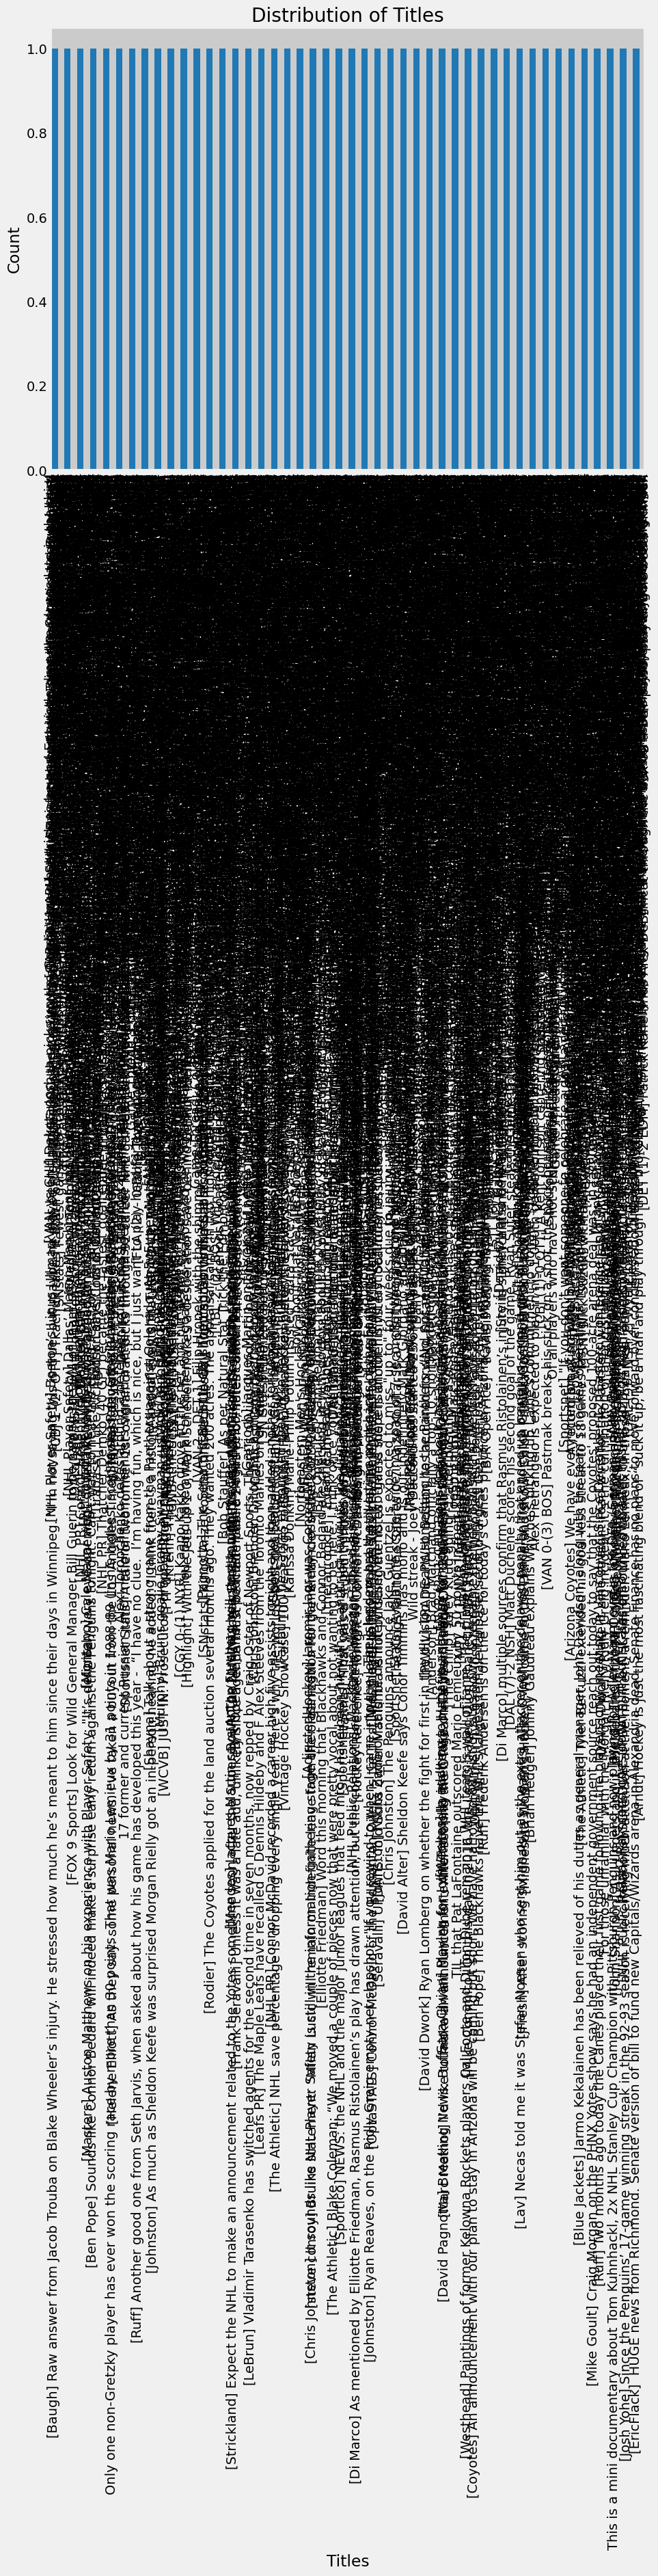

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
Hockey_df["Titles"].value_counts().plot(kind="bar", color="#2078B4")
plt.xlabel("Titles")
plt.ylabel("Count")
plt.title("Distribution of Titles")
plt.show()



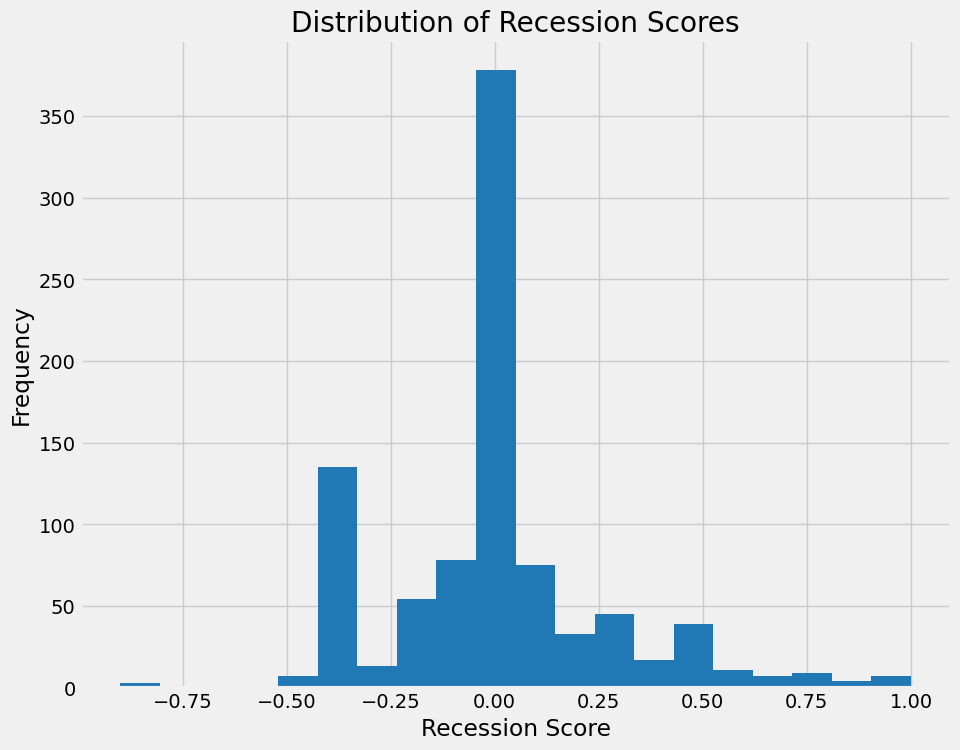

In [72]:
plt.figure(figsize=(10, 8))
Hockey_df["Polarity"].plot(kind="hist", bins=20, color="#2078B4")
plt.xlabel("Recession Score")
plt.ylabel("Frequency")
plt.title("Distribution of Recession Scores")
plt.show()


# Wordcloud

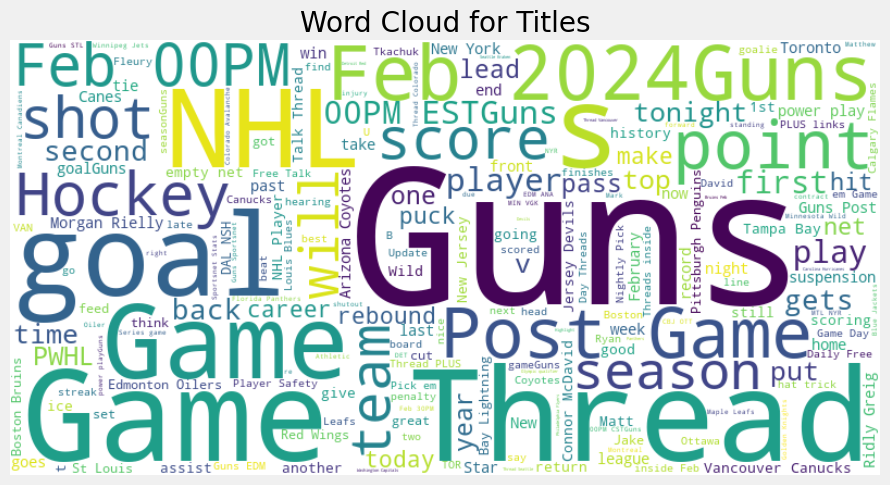

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate text values from the "Titles" column
text = 'Guns '.join(Hockey_df["Titles"].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Titles")
plt.show()



## wordcloud theme in pistol shape

In [80]:

import os
from PIL import Image

# Specify the directory
directory = r"C:\Users\mohan\Downloads\\"

# List files in the directory
files = os.listdir(directory)
print(files)

# Check if the image file exists in the directory
image_filename = "mask_image.png"
if image_filename in files:
    hockey_mask = np.array(Image.open(os.path.join(directory, image_filename)))
    # Rest of your code...
else:
    print(f"Image file '{image_filename}' not found in the specified directory.")




['.ipynb_checkpoints', '0936274mohan DL (1).ipynb', '0937480 dharmatej DL (1).ipynb', 'appl stat file.ipynb', 'applitdstatistics 660-BB (1).ipynb', 'applitdstatistics 660-BB.ipynb', 'Assignment1_Mohan.ipynb', 'Assignment2_Mohan.ipynb', 'Assignment2_Titanic_Dataset.ipynb', 'Assignment_3_Mohan.ipynb', 'Assignment_4_Mohan.ipynb', 'BUAN660_HW2.ipynb', 'ChromeSetup.exe', 'desktop.ini', 'GoodBelly_casestudy_questions.pdf', 'GoodBelly_dataset.xlsx', 'Guide to Drafting Pull Requests.docx', 'Homework1 (1).ipynb', 'Mid Exan TBA.ipynb', 'Mid Term Test - 2.14.2024.ipynb', 'Midterm_Exam (1).ipynb', 'Midterm_Exam.ipynb', 'Midterm_Exam_Solution.ipynb', 'Mid_Exam_2-14-2023.ipynb', 'Mohan_TBA_Assignment.docx', 'mvt.csv', 'notebook22f7420622.ipynb', 'python-3.12.1-amd64.exe', 'receipt-23FABUAN660BB-Final Project.txt', 'receipt-23FABUAN660BB-Homework2.txt', 'receipt-24SPCS651B-Academic Integrity Policy.txt', 'receipt-24SPCS651B-Classwork - 1 11924.txt', 'RedditApp (1).ipynb', 'SSMS-Setup-ENU.exe', 'Text 

# wordcloud theme in rifles shape¶

In [84]:
import os

# Specify the directory
directory = r"C:\Users\mohan\Downloads"

# List files in the directory
files = os.listdir(directory)
print(files)


['.ipynb_checkpoints', '0936274mohan DL (1).ipynb', '0937480 dharmatej DL (1).ipynb', 'appl stat file.ipynb', 'applitdstatistics 660-BB (1).ipynb', 'applitdstatistics 660-BB.ipynb', 'Assignment1_Mohan.ipynb', 'Assignment2_Mohan.ipynb', 'Assignment2_Titanic_Dataset.ipynb', 'Assignment_3_Mohan.ipynb', 'Assignment_4_Mohan.ipynb', 'BUAN660_HW2.ipynb', 'ChromeSetup.exe', 'desktop.ini', 'GoodBelly_casestudy_questions.pdf', 'GoodBelly_dataset.xlsx', 'Guide to Drafting Pull Requests.docx', 'Homework1 (1).ipynb', 'Mid Exan TBA.ipynb', 'Mid Term Test - 2.14.2024.ipynb', 'Midterm_Exam (1).ipynb', 'Midterm_Exam.ipynb', 'Midterm_Exam_Solution.ipynb', 'Mid_Exam_2-14-2023.ipynb', 'Mohan_TBA_Assignment.docx', 'mvt.csv', 'notebook22f7420622.ipynb', 'python-3.12.1-amd64.exe', 'receipt-23FABUAN660BB-Final Project.txt', 'receipt-23FABUAN660BB-Homework2.txt', 'receipt-24SPCS651B-Academic Integrity Policy.txt', 'receipt-24SPCS651B-Classwork - 1 11924.txt', 'RedditApp (1).ipynb', 'SSMS-Setup-ENU.exe', 'Text 

### Get the Bing liu Lexicon

In [88]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import pandas as pd

# Download the Opinion Lexicon
nltk.download('opinion_lexicon')

# Assuming you have a DataFrame named bitcoin_df with a 'Titles' column
# Replace 'Titles' with your actual column name if different

# Tokenize and calculate sentiment scores
Hockey_df['clean_tokens'] = Hockey_df['Titles'].apply(lambda x: word_tokenize(str(x)))
Hockey_df['positive_score'] = Hockey_df['clean_tokens'].apply(lambda tokens: sum(1 for word in tokens if word in opinion_lexicon.positive()))
Hockey_df['negative_score'] = Hockey_df['clean_tokens'].apply(lambda tokens: sum(1 for word in tokens if word in opinion_lexicon.negative()))

# Calculate a sentiment score (positive - negative)
Hockey_df['sentiment_score'] = Hockey_df['positive_score'] - Hockey_df['negative_score']

# Display the DataFrame with sentiment scores
print(Hockey_df[['Titles', 'positive_score', 'negative_score', 'sentiment_score']].head())

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


                                              Titles  positive_score  \
0  [VAN vs CHI] Dakota Joshua picks up the Gordie...               0   
1  Predators Sign Michael McCarron to Two-Year, $...               0   
2  PWHL Post Game Thread: Toronto vs. Boston - 14...               0   
3  [David Pagnotta] Breaking News: Buffalo will v...               0   
4  [Marc Methot] I’d like to make an announcement...               3   

   negative_score  sentiment_score  
0               1               -1  
1               0                0  
2               0                0  
3               0                0  
4               0                3  


In [86]:
# Print the DataFrame
print(Hockey_df)

# Print summary information
print(Hockey_df.info())


                                                Titles  \
0    [VAN vs CHI] Dakota Joshua picks up the Gordie...   
1    Predators Sign Michael McCarron to Two-Year, $...   
2    PWHL Post Game Thread: Toronto vs. Boston - 14...   
3    [David Pagnotta] Breaking News: Buffalo will v...   
4    [Marc Methot] I’d like to make an announcement...   
..                                                 ...   
911  /r/Hockey's top highlights for the week of Feb...   
912  Nylander and Pasta rating other athletes‘ outf...   
913  Game Thread: Dallas Stars (33-14-6) at Nashvil...   
914  [COL 2-(1) WSH] Beck Malenstyn gets one back f...   
915  [DET (1)-2 EDM] Patrick Kane finds Alex DeBrin...   

                                          clean_tokens  Subjectivity  \
0    [[, VAN, vs, CHI, ], Dakota, Joshua, picks, up...      0.300000   
1    [Predators, Sign, Michael, McCarron, to, Two-Y...      0.000000   
2    [PWHL, Post, Game, Thread, :, Toronto, vs., Bo...      0.400000   
3    [[, David,